In [3]:
from src.shockwave_drawer import ShockwaveDrawer
from src.fundamental_diagram import FundamentalDiagram
from src.augmenters.traffic_light import TrafficLight

%load_ext autoreload
%autoreload 2

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Fundamental Diagram'}, xlabel='Density (veh / m)', ylabel='Capacity (veh / s)'>)

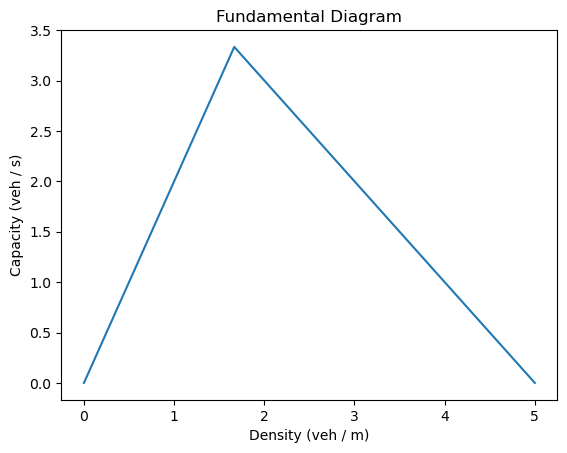

In [4]:
diagram = FundamentalDiagram(2, 5, 1)
diagram.show()

In [5]:
from src.drawer_utils import State


diagram.get_state_by_flow(0, diagram.get_state(1))

State(density=5.0, flow=0, id=1)

In [6]:
lights = []
lights.append(TrafficLight(10, [5, 5], [0, 1]))

In [7]:
simul_time = 25
drawer = ShockwaveDrawer(diagram, simul_time, lights, 1)
drawer.run()

processing CapacityEvent(point=dtPoint(time=5, position=10), type=<EventType.capacity: 2>, prior_capacity=-1, posterior_capacity=0, interface=<src.drawer_utils.Interface object at 0x0000016435285580>)
Interface(dtPoint(time=5, position=10), 0) Interface(dtPoint(time=5, position=10), -0.5)
Interface(dtPoint(time=15, position=10), 0) Interface(dtPoint(time=5, position=10), -0.5)
Interface(dtPoint(time=25, position=10), 0) Interface(dtPoint(time=5, position=10), -0.5)
Interface(dtPoint(time=5, position=10), 0) Interface(dtPoint(time=5, position=10), 2.0)
Interface(dtPoint(time=15, position=10), 0) Interface(dtPoint(time=5, position=10), 2.0)
Interface(dtPoint(time=25, position=10), 0) Interface(dtPoint(time=5, position=10), 2.0)
Interface(dtPoint(time=5, position=10), -0.5) Interface(dtPoint(time=5, position=10), 2.0)
processing CapacityEvent(point=dtPoint(time=10, position=10), type=<EventType.capacity: 2>, prior_capacity=0, posterior_capacity=-1, interface=<src.drawer_utils.Interface ob

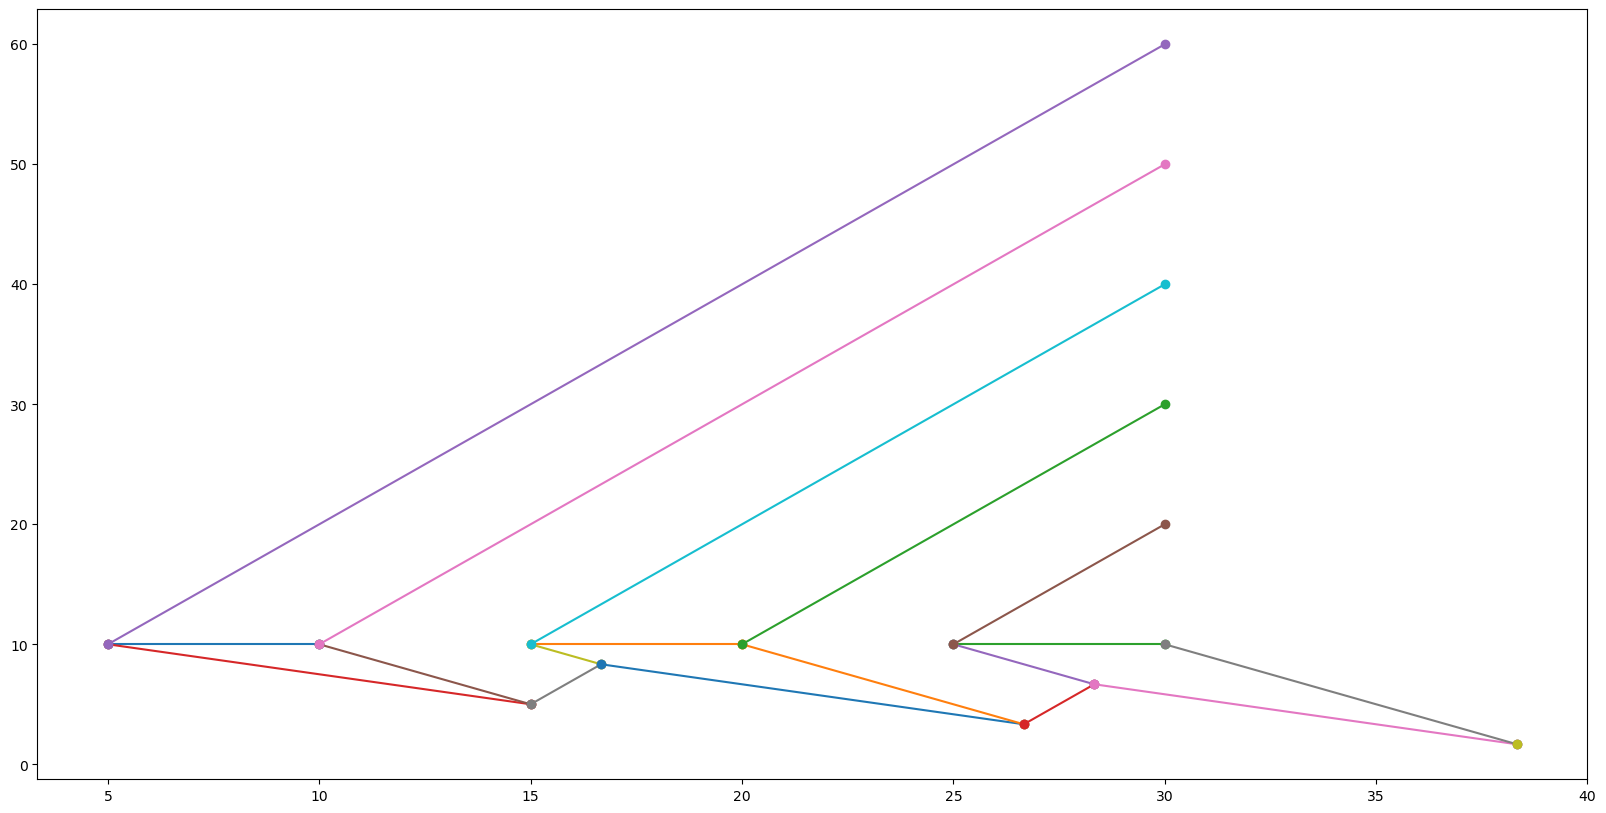

In [8]:
import matplotlib.pyplot as plt

from src.drawer_utils import dtPoint

fig, ax = plt.subplots(figsize=(20, 10))

for interface in drawer.interfaces:
    p1 = interface.endpoints[0]
    p2 = interface.endpoints[1]

    if p1 is None:
        p1 = dtPoint(0, interface.get_pos_at_time(0))
    if p2 is None:
        p2 = dtPoint(simul_time + 5, interface.get_pos_at_time(simul_time + 5))

    if p1 != p2:
        ax.plot((p1.time, p2.time), (p1.position, p2.position), marker="o")

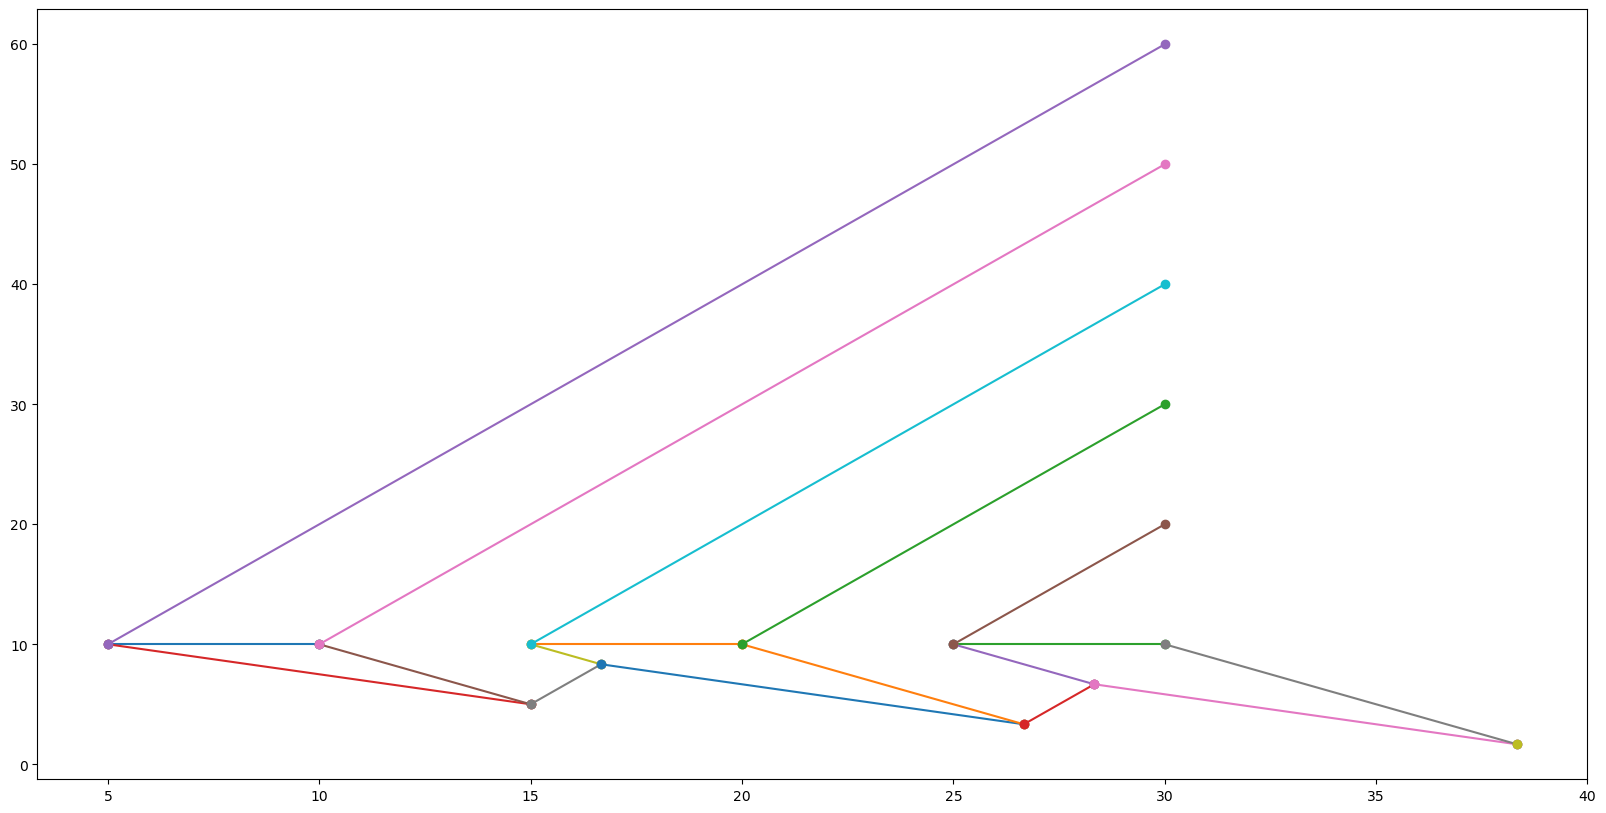

slept 2 sec


In [9]:
from IPython.display import display, clear_output
from time import sleep

for i in range(len(drawer.figures)):
    clear_output(wait=True)

    display(drawer.figures[i][0])
    plt.close()  # .close prevents the normal figure display at end of cell execution

    sleep(2)
